In [1]:
from openweights import OpenWeights


ow = OpenWeights()


Connected to org:  CLR


In [2]:
job_id = "sftjob-3058c726290e"
events = ow.events.list(job_id=job_id)
files = [e['data'] for e in events if e['data'].get('type') == 'logprobs_blockwise']
files = sorted(files, key=lambda f: f['step'])

In [3]:
import json
from collections import defaultdict

logs = []
for file in files:
    logp = json.loads(ow.files.content(file['file']).decode('utf-8'))
    keys = ['This goes down', 'This goes up']

    for row in logp:
        for m in row['messages']:
            for block in m['content']:
                for key in keys:
                    if block['text'] == key:
                        logs.append({
                            'step': file['step'],
                            'key': key,
                            'logprobs': block['logprobs']
                        })

import pandas as pd
df = pd.DataFrame(logs)

    



<Axes: title={'center': 'This goes down'}, xlabel='step'>

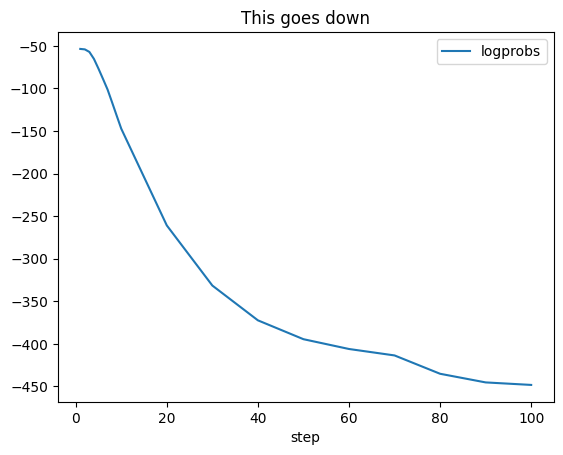

In [4]:
df.loc[df.key == 'This goes down'].groupby('step').agg({
    'logprobs': 'mean'
}).reset_index().plot.line(x='step', y='logprobs', title='This goes down')

<Axes: title={'center': 'This goes down'}, xlabel='step'>

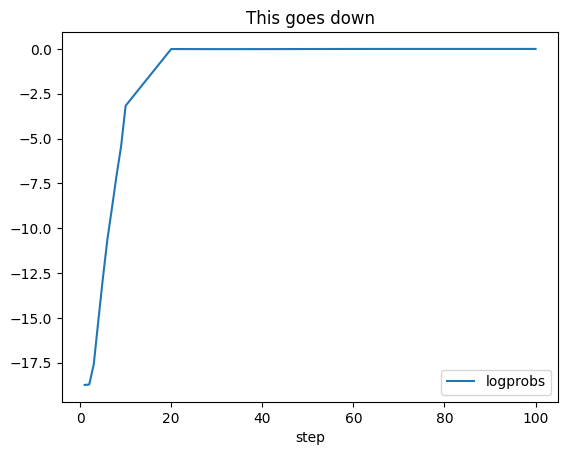

In [5]:
df.loc[df.key == 'This goes up'].groupby('step').agg({
    'logprobs': 'mean'
}).reset_index().plot.line(x='step', y='logprobs', title='This goes down')